In [44]:
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

In [45]:
# data = pd.read_csv('TEST Dataset.csv')
data = pd.read_csv('IMDB Dataset.csv')

reviews = data['review']
sentiments = data['sentiment']

print('Number of Reviews: ', len(reviews))
print('% Positive: ', (len(reviews[sentiments == 'positive'])/len(reviews))*100)
print('% Positive: ', (len(reviews[sentiments == 'negative'])/len(reviews))*100)

#Removing Punctuation
reviews = reviews.str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

# Creating Bag Of Words
vectorizer = CountVectorizer(stop_words='english') #Removes some words like 'the' 'and' 'a' 
x = vectorizer.fit_transform(reviews)

#Predictive Model Split
x_train, x_test, y_train, y_test = train_test_split(x, sentiments, test_size=0.2, random_state=1)

Number of Reviews:  50000
% Positive:  50.0
% Positive:  50.0


In [52]:
from sklearn import tree

def DT(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        clf = tree.DecisionTreeClassifier(max_depth=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Decision Tree: Accuracy vs. Max Depth')
    plt.xlabel('Max Depth')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best Decision Tree Depth: ', best)

    return best

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        clf = KNeighborsClassifier(n_neighbors=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('K-Nearest Neighbor: Accuracy vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)

    return best

In [48]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, y_train, hyper):
    scoresAvg = []

    for param in hyper:
        clf = LogisticRegression(C=param)
        scores = cross_val_score(clf, x_train, y_train, scoring='accuracy')
        scoresAvg.append(scores.mean())

    best = hyper[scoresAvg.index(max(scoresAvg))]

    plt.figure(figsize=(8, 6))
    plt.plot(hyper, scoresAvg, marker='o', linestyle='-', color='b')
    plt.title('Logistic Regression : Accuracy vs. K Value')
    plt.xlabel('C Value')
    plt.ylabel('Average Accuracy Score')
    plt.xticks(hyper)
    plt.grid(True)
    plt.show()

    print('Best K Value: ', best)

    return best

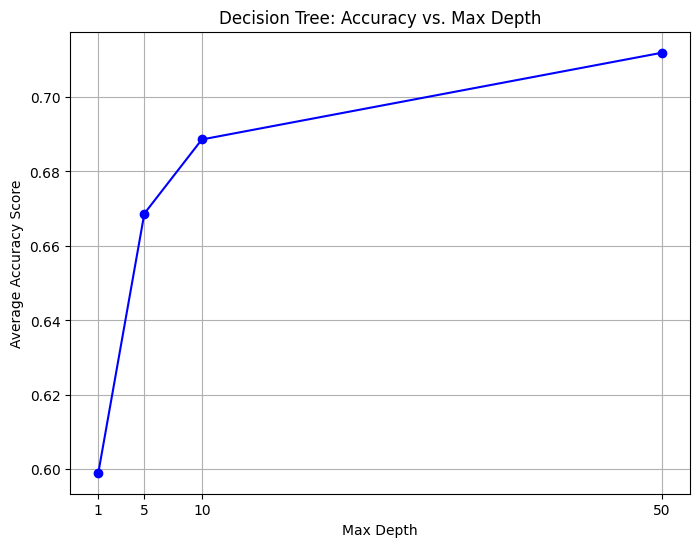

Best Decision Tree Depth:  50


In [49]:
DT_DEPTHS = [1, 5, 10, 50]
bestD = DT(x_test, y_test, DT_DEPTHS)

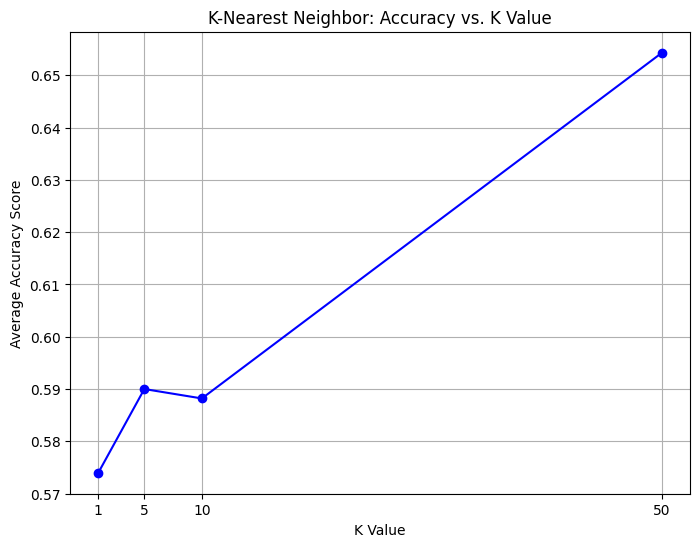

Best K Value:  50


In [50]:
kVals = [1, 5, 10, 50]
bestK = KNN(x_test, y_test, kVals)

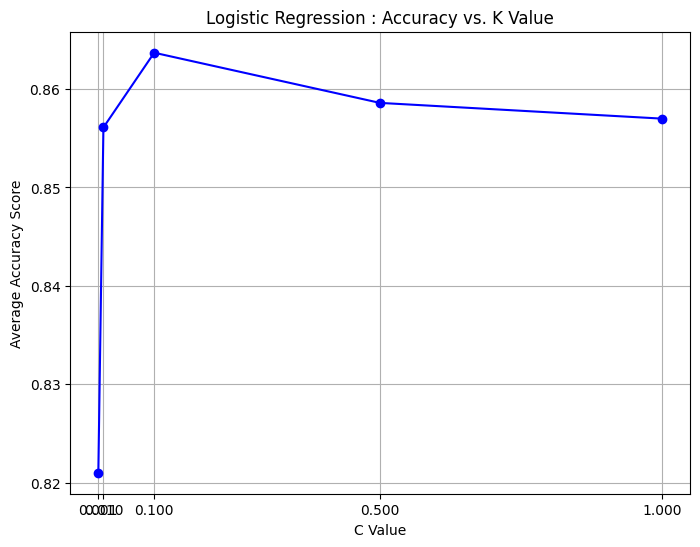

Best K Value:  0.1


In [51]:
cVals = [0.001, 0.01, 0.1, 0.5, 1]
bestC = LR(x_test, y_test, cVals)

In [62]:
DT = tree.DecisionTreeClassifier(max_depth=bestD)
DT.fit(x_train, y_train)

KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(x_train, y_train)
              
LR = LogisticRegression(C=bestC)
LR.fit(x_train, y_train)

c:\Users\A02329350\env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

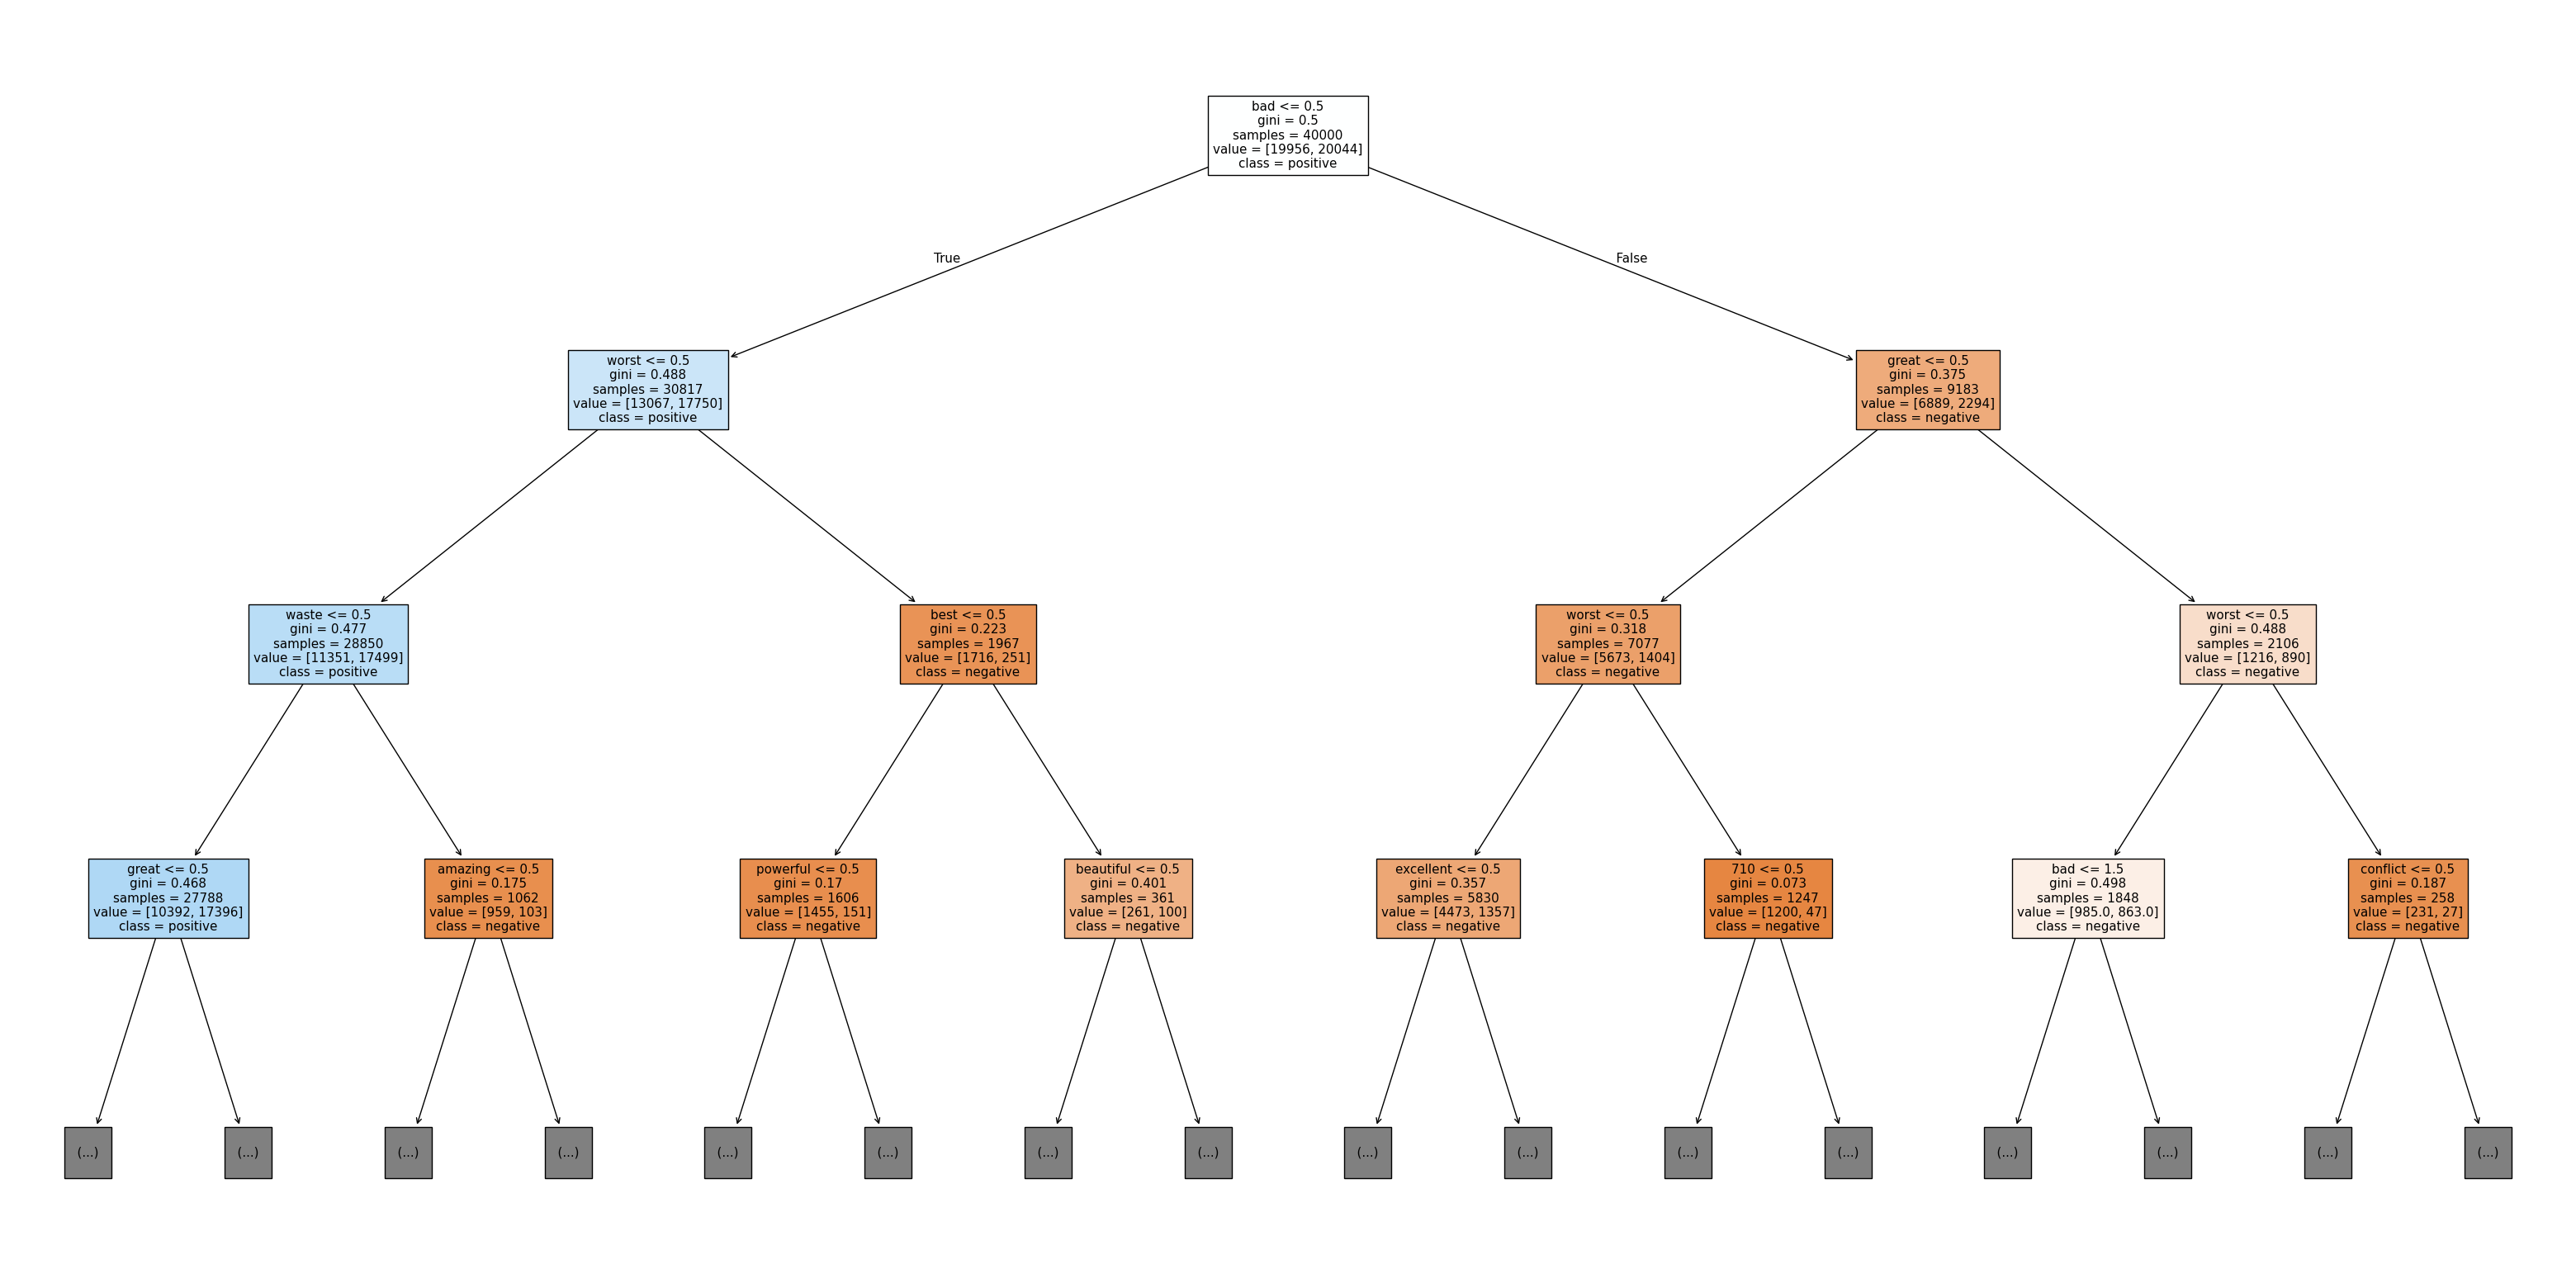

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()
class_names = DT.classes_

plt.figure(figsize=(40, 20))
plot_tree(DT, filled=True, feature_names=feature_names, class_names=class_names, max_depth=3)
plt.show()


In [82]:
importances = DT.feature_importances_

words = vectorizer.get_feature_names_out()
importantWords = pd.DataFrame({
    'word': words,
    'importance': importances
})

mostImportant = importantWords.sort_values(by='importance', ascending=False)
print("Most Important Words\n")
print(mostImportant.head(15))


Most Important Words

             word  importance
14632         bad    0.098260
177191      worst    0.060101
68473       great    0.041507
172857      waste    0.037473
14033       awful    0.025243
21596      boring    0.018161
54362   excellent    0.017369
18188        best    0.013960
158623   terrible    0.012161
123107       poor    0.010310
153502     stupid    0.010031
123122     poorly    0.008230
176538  wonderful    0.007336
122111       plot    0.006482
94542        love    0.006262
